# Plot figures for brain left and right classification results

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

import sys
sys.path.insert(0, '..')

# from utils.io_ import load_result, reformat_results
from plt_cls_result import load_result, reformat_results, plot_accuracy, plot_gsi
# from plot import plot_accuracy, plot_gsi, load_weight_plot_corr, load_coef_plot_corr
from utils import plot

## Plot classification results

### HCP

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/HCP/BNA/Models"
seed_start = 2022
dataset = "HCP"
test_size = 0.0
fontsize = 14

In [ ]:
lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]

# lambdas = ["0_group_mix"]

In [ ]:
# col_names = ["acc_ic_is", "acc_ic_os", "acc_oc_is", "acc_oc_os", "pred_loss", "hsic_loss"]

res_df_all = load_result(dataset=dataset, root_dir=model_root_dir, 
                         lambdas=lambdas, seed_start=seed_start, test_size=test_size)
# res_df_all["gap_is"] = res_df_all["acc_ic_is"] - res_df_all["acc_oc_is"]
# res_df_all["gap_os"] = res_df_all["acc_ic_os"] - res_df_all["acc_oc_os"]
res_df_all["GSI_is"] = 2 * (res_df_all["acc_ic_is"] * (res_df_all["acc_ic_is"] - res_df_all["acc_oc_is"])) 
res_df_all["GSI_os"] = 2 * (res_df_all["acc_ic_os"] * (res_df_all["acc_ic_os"] - res_df_all["acc_oc_os"])) 

res_df_is = reformat_results(res_df_all, ["acc_ic_is", "acc_oc_is"])
res_df_os = reformat_results(res_df_all, ["acc_ic_os", "acc_oc_os"])

res_df_all["train_gender"] = res_df_all["train_gender"].astype(object)

res_df_all.loc[res_df_all["train_gender" ]==0, "train_gender" ] = "Male"
res_df_all.loc[res_df_all["train_gender" ]==1, "train_gender" ] = "Female"

In [ ]:
# Control results

male_accs = res_df_all[res_df_all["train_gender"]=="Male"]["acc_ic_is"]
female_accs = res_df_all[res_df_all["train_gender"]=="Male"]["acc_oc_is"]

print("Male acc: %.2f $\pm$ %.2f" % (np.mean(male_accs) * 100, np.std(male_accs) * 100))
print("Female acc: %.2f $\pm$ %.2f" % (np.mean(female_accs)* 100, np.std(female_accs) * 100))

In [ ]:
groups = ["Male", "Female"]
for lambda_ in [0.0, 5.0]:
    df_l = res_df_is[res_df_is["Lambda"]==lambda_]
    for tgt in range(len(groups)):
        tgt_df = df_l[(df_l["Target group"]==groups[tgt]) & (df_l["Test set"]==groups[tgt])]
        nt_df = df_l[(df_l["Target group"]==groups[tgt]) & (df_l["Test set"]==groups[1- tgt])]
        print("Lambda: %.1f, Target: %s" % (lambda_, groups[tgt]))
        print("Target group acc: %.2f $\pm$ %.2f" % (np.mean(tgt_df["Accuracy"]) * 100, np.std(tgt_df["Accuracy"]) * 100))
        print("Non-target group acc: %.2f $\pm$ %.2f" % (np.mean(nt_df["Accuracy"]) * 100, np.std(nt_df["Accuracy"]) * 100))

Lambda: 0.0, Target: Male
Target group acc: 99.87 $\pm$ 0.16
Non-target group acc: 99.85 $\pm$ 0.17
Lambda: 0.0, Target: Female
Target group acc: 99.93 $\pm$ 0.12
Non-target group acc: 99.99 $\pm$ 0.04
Lambda: 5.0, Target: Male
Target group acc: 92.75 $\pm$ 1.83
Non-target group acc: 68.52 $\pm$ 2.88
Lambda: 5.0, Target: Female
Target group acc: 93.16 $\pm$ 1.89
Non-target group acc: 70.76 $\pm$ 2.56


In [ ]:
res_df_is["Target group"]==groups[tgt] 
res_df_is["Test set"]!=groups[tgt]

0        False
1         True
2         True
3        False
4        False
         ...  
23995    False
23996    False
23997     True
23998     True
23999    False
Name: Test set, Length: 24000, dtype: bool

<Figure size 640x480 with 0 Axes>

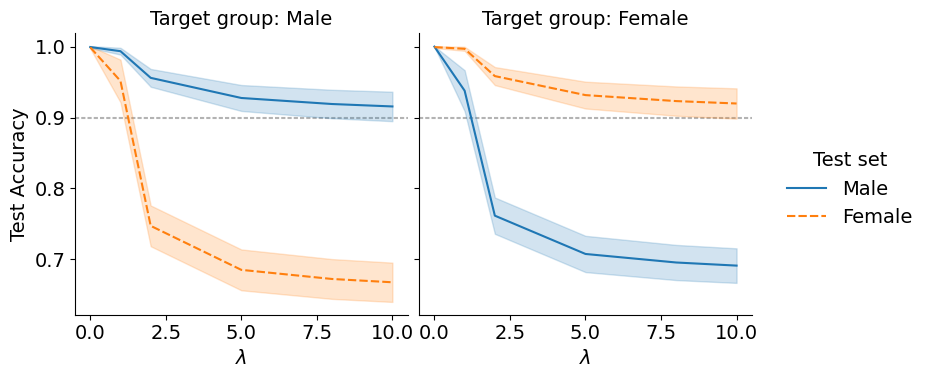

<Figure size 640x480 with 0 Axes>

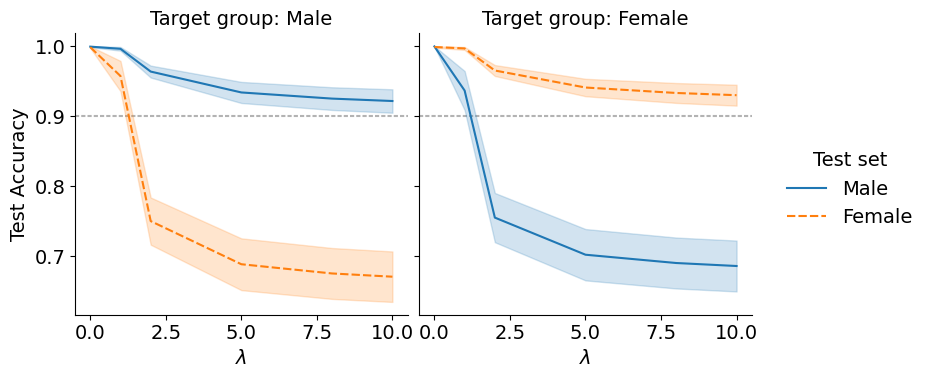

In [ ]:
plot_accuracy(res_df_is, outfile="figures/HCP_in_session_test%s" % test_size, outfig_format=["svg", "pdf"])
plot_accuracy(res_df_os, outfile="figures/HCP_out_session_test%s" % test_size, outfig_format=["svg", "pdf"])

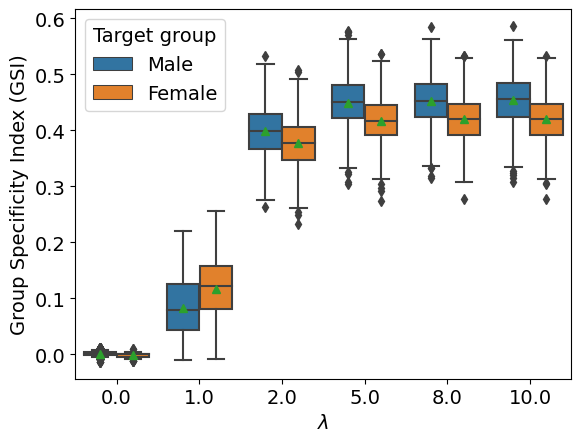

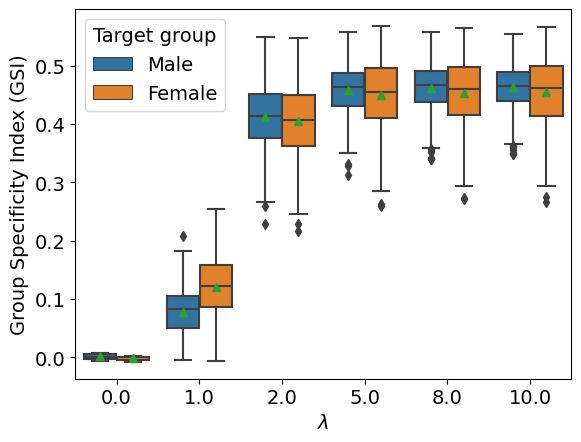

In [ ]:
plot_gsi(res_df_all, x="lambda", y="GSI_is", hue="train_gender", outfile="figures/GSI_box_HCP_in_session_test", outfig_format=["svg", "pdf"])
plot_gsi(res_df_all, x="lambda", y="GSI_os", hue="train_gender", outfile="figures/GSI_box_HCP_out_session_test", outfig_format=["svg", "pdf"])

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/HCP/BNA/Models/test_size02"
seed_start = 2023
dataset = "HCP"
test_size = 0.2

In [ ]:
col_names = ["acc_ic_is", "acc_ic_os", "acc_oc_is", "acc_oc_os", "acc_tgt_test_sub", "acc_nt_test_sub",
             "pred_loss", "hsic_loss"]

res_df_all = load_result(dataset=dataset, root_dir=model_root_dir, 
                         lambdas=lambdas, seed_start=seed_start, test_size=test_size)
res_df_all["gap_is"] = res_df_all["acc_ic_is"] - res_df_all["acc_oc_is"]
res_df_all["gap_os"] = res_df_all["acc_ic_os"] - res_df_all["acc_oc_os"]
res_df_all["gap_test_sub"] = res_df_all["acc_tgt_test_sub"] - res_df_all["acc_nt_test_sub"]

res_df_all["GSI_is"] = 2 * (res_df_all["acc_ic_is"] * (res_df_all["acc_ic_is"] - res_df_all["acc_oc_is"])) 
res_df_all["GSI_os"] = 2 * (res_df_all["acc_ic_os"] * (res_df_all["acc_ic_is"] - res_df_all["acc_oc_is"]))
res_df_all["GSI_test_sub"] = 2 * (res_df_all["acc_tgt_test_sub"] * (res_df_all["acc_tgt_test_sub"] - res_df_all["acc_nt_test_sub"]))

res_df_is = reformat_results(res_df_all, ["acc_ic_is", "acc_oc_is"])
res_df_os = reformat_results(res_df_all, ["acc_ic_os", "acc_oc_os"])
res_df_test_sub = reformat_results(res_df_all, ["acc_tgt_test_sub", "acc_nt_test_sub"])

res_df_all.loc[res_df_all["train_gender" ]==0, "train_gender" ] = "Male"
res_df_all.loc[res_df_all["train_gender" ]==1, "train_gender" ] = "Female"

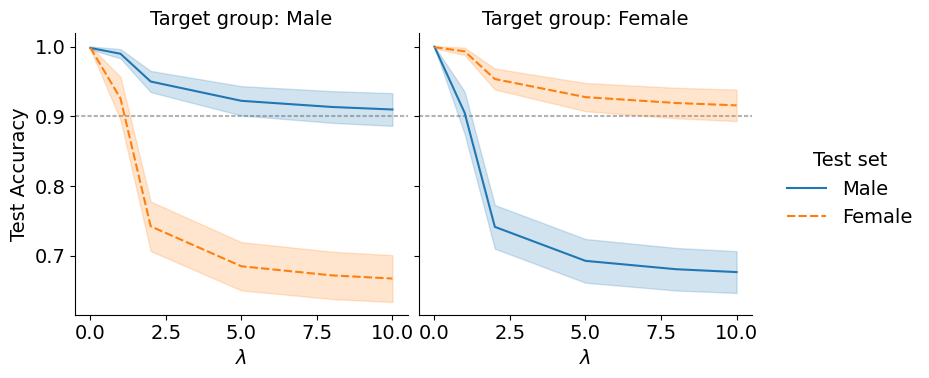

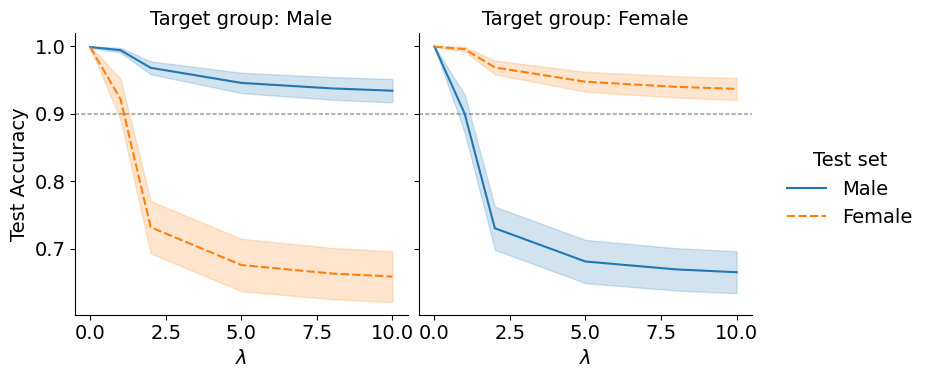

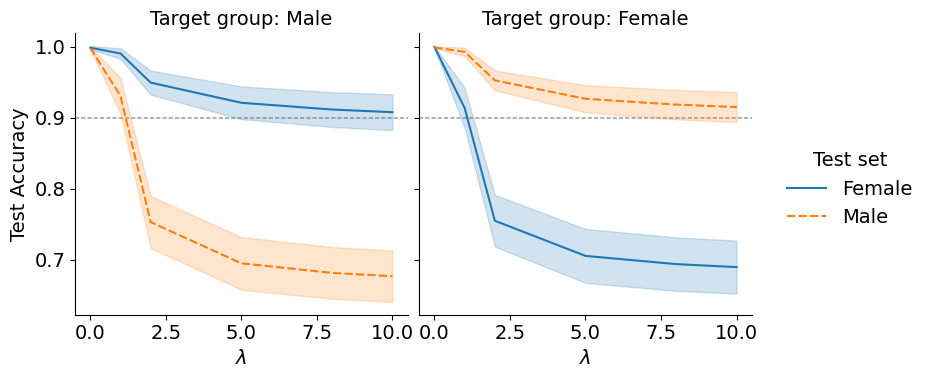

In [ ]:
plot_accuracy(res_df_is, outfile="figures/HCP_in_session_test%s" % test_size)
plot_accuracy(res_df_os, outfile="figures/HCP_out_session_test%s" % test_size)
plot_accuracy(res_df_test_sub, outfile="figures/HCP_test_sub_test%s" % test_size)

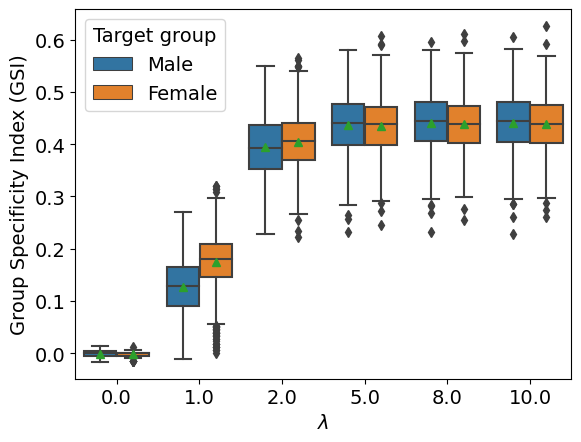

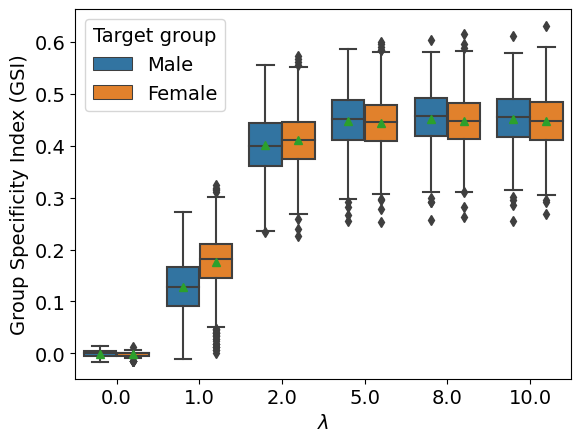

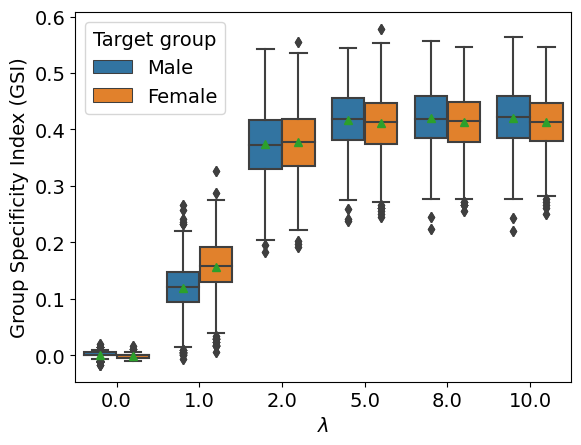

In [ ]:
plot_gsi(res_df_all, x="lambda", y="GSI_is", hue="train_gender", outfile="figures/GSI_box_HCP_in_session_test%s" % test_size)
plot_gsi(res_df_all, x="lambda", y="GSI_os", hue="train_gender", outfile="figures/GSI_box_HCP_out_session_test%s" % test_size)
plot_gsi(res_df_all, x="lambda", y="GSI_test_sub", hue="train_gender", outfile="figures/GSI_box_HCP_test_sub_test%s" % test_size)

In [ ]:
print(np.mean(res_df_is["Accuracy"]))
print(np.std(res_df_is["Accuracy"]))

0.9995905639794916
0.0010194239783747954


In [ ]:
print(np.mean(res_df_os["Accuracy"]))
print(np.std(res_df_os["Accuracy"]))

0.9995268926584487
0.0008447307486945751


### GSP

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/brain/brain_networks/gsp/Models"
seed_start = 2023
# col_names = ["acc_ic", "acc_oc", "pred_loss", "code_loss"]
dataset = "gsp"

In [ ]:
# lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
lambdas = ["0_group_mix"]

In [ ]:
res_df_all = load_result(dataset=dataset, root_dir=model_root_dir, 
                         lambdas=lambdas, seed_start=seed_start)
res_df_all["gap"] = res_df_all["acc_ic"] - res_df_all["acc_oc"]
res_df_all["GSI"] = 2 * (res_df_all["acc_ic"] * (res_df_all["acc_ic"] - res_df_all["acc_oc"]))

res_df_reformat = reformat_results(res_df_all, ["acc_ic", "acc_oc"])

res_df_all.loc[res_df_all["train_gender" ]==0, "train_gender" ] = "Male"
res_df_all.loc[res_df_all["train_gender" ]==1, "train_gender" ] = "Female"

In [ ]:
# Control results

male_accs = res_df_all["acc_ic"].loc[0::2]
female_accs = res_df_all["acc_oc"].loc[0::2]

print("Male acc: %.2f $\pm$ %.2f" % (np.mean(male_accs) * 100, np.std(male_accs) * 100))
print("Female acc: %.2f $\pm$ %.2f" % (np.mean(female_accs)* 100, np.std(female_accs) * 100))

Male acc: 99.94 $\pm$ 0.07
Female acc: 100.00 $\pm$ 0.01


In [ ]:
male_accs

0      1.000000
2      1.000000
4      1.000000
6      0.998496
8      1.000000
         ...   
990    1.000000
992    0.998496
994    1.000000
996    1.000000
998    1.000000
Name: acc_ic, Length: 500, dtype: float64

In [ ]:
def plot_gaps(gaps, dataset, fontsize=14, color="steelblue", metric="gap", ylabel="Accuracy gap"):
    lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
    plt.figure(figsize=(4, 4))
    plt.plot(lambdas, gaps['mean'], '-', c=color)
    plt.fill_between(lambdas, np.asarray(gaps['mean']) - np.asarray(gaps['std']),
                    np.asarray(gaps['mean']) + np.asarray(gaps['std']), color=color, alpha=0.2)
    # plt.margins(x=0)
    # plt.legend(loc=5)
    # plt.ylim(bottom=0.6)
    plt.rcParams['text.usetex'] = True
    plt.xlabel(r'$\lambda$', fontsize=fontsize)
    plt.rcParams['text.usetex'] = False
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.savefig('figures/%s_acc_%s.pdf' % (dataset, metric), format='pdf', bbox_inches='tight')
    plt.savefig('figures/%s_acc_%s.png' % (dataset, metric), format='png', bbox_inches='tight')
    plt.show()

In [ ]:
groups = ["Male", "Female"]
for lambda_ in [0.0, 5.0]:
    df_l = res_df_reformat[res_df_reformat["Lambda"]==lambda_]
    for tgt in range(len(groups)):
        tgt_df = df_l[(df_l["Target group"]==groups[tgt]) & (df_l["Test set"]==groups[tgt])]
        nt_df = df_l[(df_l["Target group"]==groups[tgt]) & (df_l["Test set"]==groups[1- tgt])]
        print("Lambda: %.1f, Target: %s" % (lambda_, groups[tgt]))
        print("Target group acc: %.2f $\pm$ %.2f" % (np.mean(tgt_df["Accuracy"]) * 100, np.std(tgt_df["Accuracy"]) * 100))
        print("Non-target group acc: %.2f $\pm$ %.2f" % (np.mean(nt_df["Accuracy"]) * 100, np.std(nt_df["Accuracy"]) * 100))

Lambda: 0.0, Target: Male
Target group acc: 99.93 $\pm$ 0.08
Non-target group acc: 100.00 $\pm$ 0.01
Lambda: 0.0, Target: Female
Target group acc: 99.97 $\pm$ 0.05
Non-target group acc: 99.95 $\pm$ 0.07
Lambda: 5.0, Target: Male
Target group acc: 91.85 $\pm$ 1.77
Non-target group acc: 71.28 $\pm$ 2.13
Lambda: 5.0, Target: Female
Target group acc: 92.81 $\pm$ 1.35
Non-target group acc: 74.70 $\pm$ 2.22


In [ ]:
res_df_reformat

,Accuracy,Test set,Lambda,Target group,seed,split,fold,Train session
0,0.998496,Male,0.0,Male,2023.0,0.0,0.0,None
1,1.000000,Female,0.0,Male,2023.0,0.0,0.0,None
2,1.000000,Female,0.0,Female,2023.0,0.0,0.0,None
3,1.000000,Male,0.0,Female,2023.0,0.0,0.0,None
4,1.000000,Male,0.0,Male,2023.0,0.0,1.0,None
...,...,...,...,...,...,...,...,...
11995,0.712782,Male,10.0,Female,1974.0,4.0,0.0,None
11996,0.900752,Male,10.0,Male,1974.0,4.0,1.0,None
11997,0.702762,Female,10.0,Male,1974.0,4.0,1.0,None
11998,0.929282,Female,10.0,Female,1974.0,4.0,1.0,None


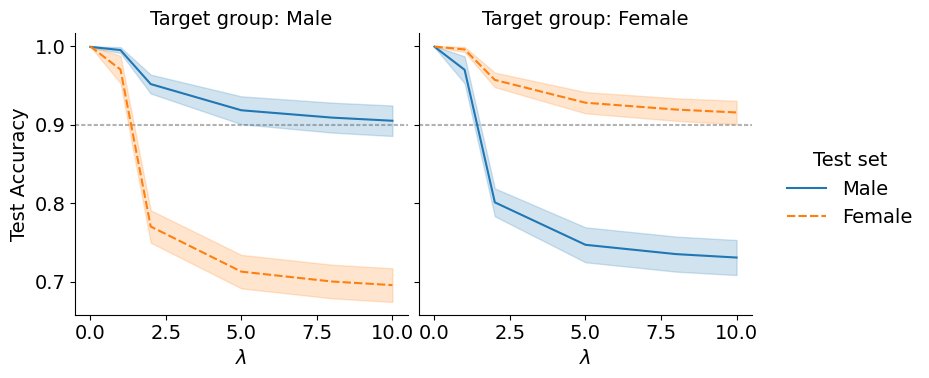

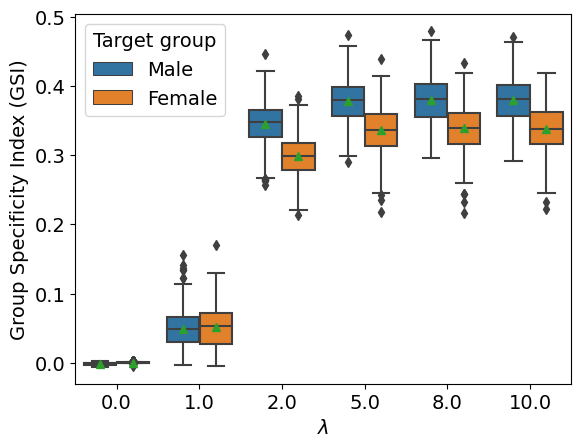

In [ ]:
plot_accuracy(res_df_reformat, outfile="figures/GSP_test")
plot_gsi(res_df_all, x="lambda", y="GSI", hue="train_gender", outfile="figures/GSI_box_GSP_test")

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/brain/brain_networks/gsp/Models/hold_test_sub/"
seed_start = 2023
# col_names = ["acc_ic", "acc_oc", "pred_loss", "code_loss"]
dataset = "gsp"
test_size = 0.2

In [ ]:
# col_names = ["acc_ic_is", "acc_ic_os", "acc_oc_is", "acc_oc_os", "acc_tgt_test_sub", "acc_nt_test_sub",
#              "pred_loss", "hsic_loss"]

res_df_all = load_result(dataset=dataset, root_dir=model_root_dir, 
                         lambdas=lambdas, seed_start=seed_start, test_size=test_size)

res_df_all["gap"] = res_df_all["acc_ic"] - res_df_all["acc_oc"]
res_df_all["gap_test_sub"] = res_df_all["acc_tgt_test_sub"] - res_df_all["acc_nt_test_sub"]

res_df_all["GSI"] = 2 * (res_df_all["acc_ic"] * (res_df_all["acc_ic"] - res_df_all["acc_oc"]))
res_df_all["GSI_test_sub"] = 2 * (res_df_all["acc_tgt_test_sub"] * (res_df_all["acc_tgt_test_sub"] - res_df_all["acc_nt_test_sub"]))

res_df_reformat = reformat_results(res_df_all, ["acc_ic", "acc_oc"])
res_df_test_sub = reformat_results(res_df_all, ["acc_tgt_test_sub", "acc_nt_test_sub"])

res_df_all.loc[res_df_all["train_gender" ]==0, "train_gender" ] = "Male"
res_df_all.loc[res_df_all["train_gender" ]==1, "train_gender" ] = "Female"

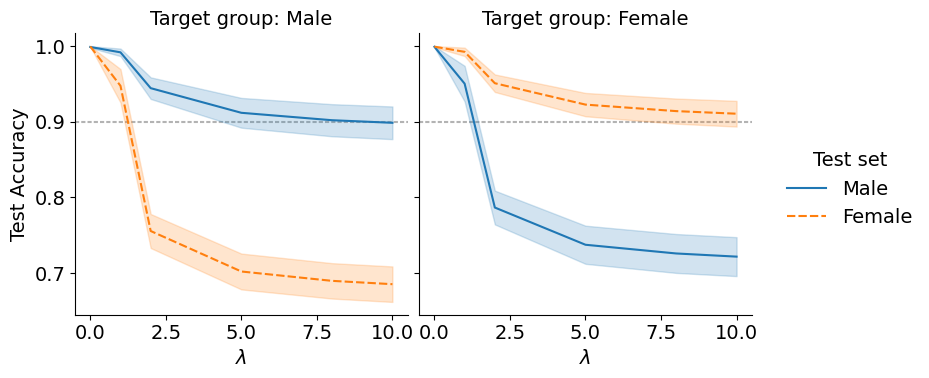

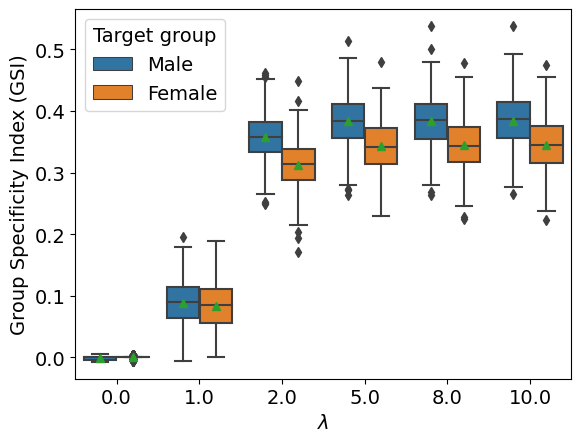

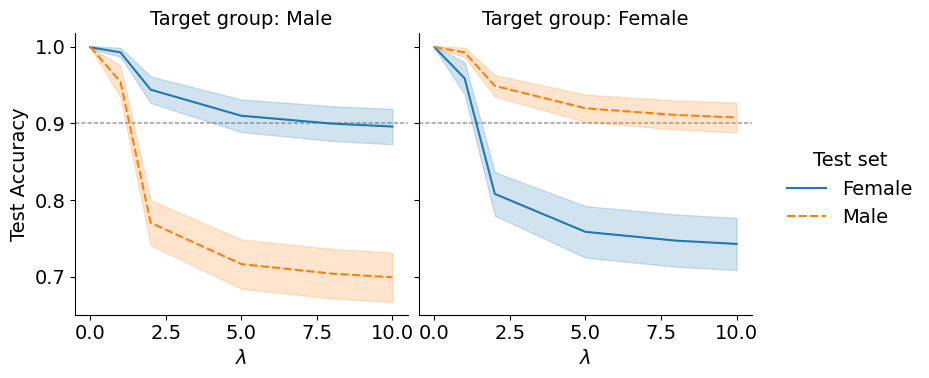

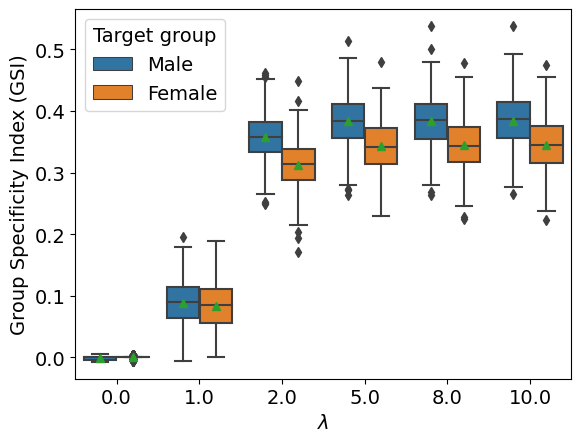

In [ ]:
plot_accuracy(res_df_reformat, outfile="figures/GSP_test%s" % test_size)
plot_gsi(res_df_all, x="lambda", y="GSI", hue="train_gender",
              outfile="figures/GSI_box_GSP_test%s" % test_size)

plot_accuracy(res_df_test_sub, outfile="figures/GSP_test_sub_test%s" % test_size)
plot_gsi(res_df_all, x="lambda", y="GSI", hue="train_gender",
              outfile="figures/GSI_box_GSP_test_sub_test%s" % test_size)

### UKB

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/brain/brain_networks/ukbio/Models"
lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
seed_start = 2023
# col_names = ["acc_ic", "acc_oc", "pred_loss", "code_loss"]
dataset = "ukb"

res_df_all = load_result(dataset=dataset, root_dir=model_root_dir, 
                         lambdas=lambdas, seed_start=seed_start)
res_df_all["gap"] = res_df_all["acc_ic"] - res_df_all["acc_oc"]
res_df_reformat = reformat_results(res_df_all, ["acc_ic", "acc_oc"], male=1)

In [ ]:
g = sns.relplot(
    data=res_df_reformat, x="Lambda", y="Accuracy", col="Target group",
    hue="Test set", style="Test set", kind="line", errorbar=("sd", 1),)
(g.map(plt.axhline, y=0.85, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels(r'$\lambda$', "Test Accuracy", fontsize=12)
  .set_titles("Target group: {col_name}")
  .tight_layout(w_pad=0))
plt.savefig('figures/UKB_test.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/UKB_test.png', format='png', bbox_inches='tight')
plt.show()

## Plot weight correlation

### GSP

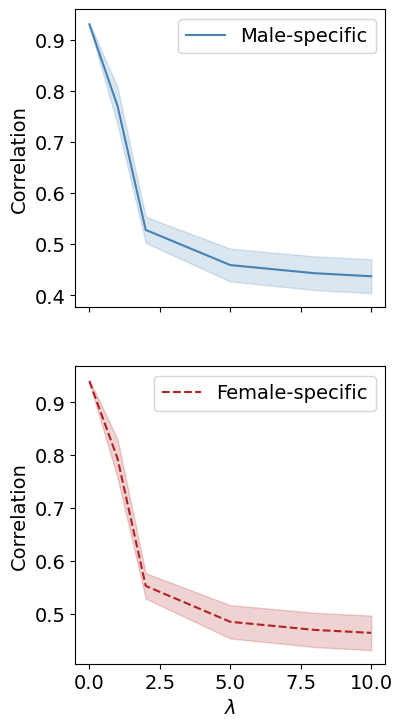

In [ ]:
dataset = "gsp"
base_dir = "/media/shuo/MyDrive/data/brain/brain_networks/gsp/Models"
sessions = [""]
seed_ = 2023

plot.load_weight_plot_corr(dataset, base_dir, sessions, seed_)

### HCP

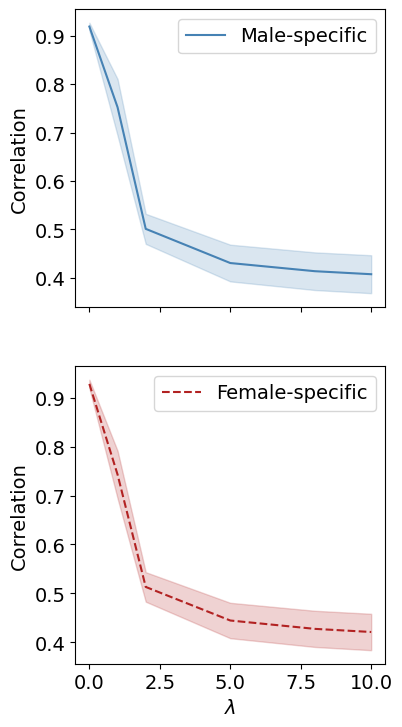

In [ ]:
dataset = "HCP"
base_dir = "/media/shuo/MyDrive/data/HCP/BNA/Models"
sessions = ["REST1_", "REST2_"]
seed_ = 2022

plot.load_weight_plot_corr(dataset, base_dir, sessions, seed_)

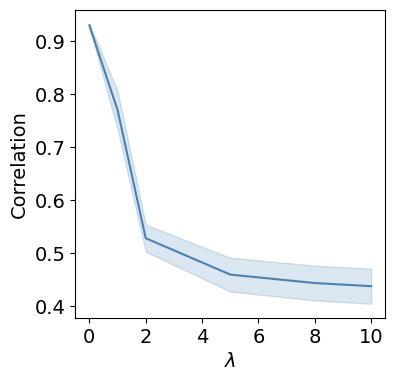

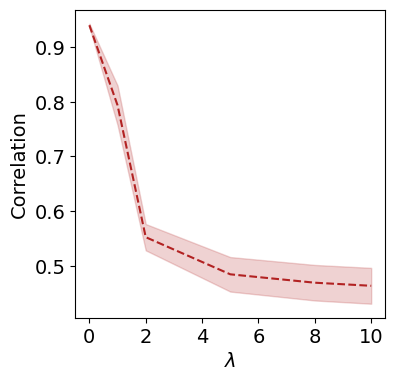

In [ ]:
# plt.figure().set_figheight(4)
fontsize = 14

plt.figure(figsize=(4, 4))
plt.plot(lambdas, corrs['mean'][::2] , '-', c="steelblue")
plt.fill_between(lambdas, np.asarray(corrs['mean'][::2]) - np.asarray(corrs['sd'][::2]), 
                 np.asarray(corrs['mean'][::2]) + np.asarray(corrs['sd'][::2]), color="steelblue", alpha=0.2)
# plt.margins(x=0)
# plt.legend(loc=5)
# plt.ylim(bottom=0.6)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.rcParams['text.usetex'] = False
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Correlation", fontsize=fontsize)
plt.savefig('figures/%s_corr_m.pdf' % dataset, format='pdf', bbox_inches='tight')
plt.savefig('figures/%s_corr_m.png' % dataset, format='png', bbox_inches='tight')
plt.show()

# plt.figure().set_figheight(4)
plt.figure(figsize=(4, 4))
plt.plot(lambdas, corrs['mean'][1::2] , '--', color='firebrick')
plt.fill_between(lambdas, np.asarray(corrs['mean'][1::2]) - np.asarray(corrs['sd'][1::2]), 
                 np.asarray(corrs['mean'][1::2]) + np.asarray(corrs['sd'][1::2]), color='firebrick', alpha=0.2)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.rcParams['text.usetex'] = False
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Correlation", fontsize=fontsize)
plt.savefig('figures/%s_corr_f.pdf' % dataset, format='pdf', bbox_inches='tight')
plt.savefig('figures/%s_corr_f.png' % dataset, format='png', bbox_inches='tight')
plt.show()

### Correlation matrix

In [ ]:
weights_dirs = {
    "Multivariate Control HCP": "./first-order/HCP/HCP_L0Gmix.mat", 
    "GSDA $\lambda=0$ Male HCP": "./first-order/HCP/HCP_L0G0.mat", 
    "GSDA $\lambda=0$ Female HCP": "./first-order/HCP/HCP_L0G1.mat", 
    "Multivariate Control GSP": "./first-order/GSP/GSP_L0_mix_genderGmix.mat",
    "GSDA $\lambda=0$ Male GSP": "./first-order/GSP/GSP_L0G0.mat", 
    "GSDA $\lambda=0$ Female GSP": "./first-order/GSP/GSP_L0G1.mat", 
    "GSDA $\lambda=5$ Male HCP": "./first-order/HCP/HCP_L5G0.mat", 
    "GSDA $\lambda=5$ Female HCP": "./first-order/HCP/HCP_L5G1.mat", 
    "GSDA $\lambda=5$ Male GSP": "./first-order/GSP/GSP_L5G0.mat", 
    "GSDA $\lambda=5$ Female GSP": "./first-order/GSP/GSP_L5G1.mat", 
    }

weights = dict()

for key in weights_dirs:
    # print(key)
    weights[key] = loadmat(weights_dirs[key])["mean"][0][1:]
    
weight_df = pd.DataFrame(weights)

HCP_tval = pd.read_csv("../post_analysis/univariate/REST1_univariate_L_vs_R_gender_tvalue_uncorrected.csv")
HCP_tval = HCP_tval.rename(columns={'M_F': 'Univariate Control HCP ', 'M': 'Univariate Male HCP', 'F': 'Univariate Female HCP'})
GSP_tval = pd.read_csv("../post_analysis/univariate/GSP_univariate_L_vs_R_gender_tvalue_uncorrected.csv")
GSP_tval = GSP_tval.rename(columns={'M_F': 'Univariate Control GSP ', 'M': 'Univariate Male GSP', 'F': 'Univariate Female GSP'})

weight_df = pd.concat((HCP_tval, GSP_tval, weight_df), axis=1)

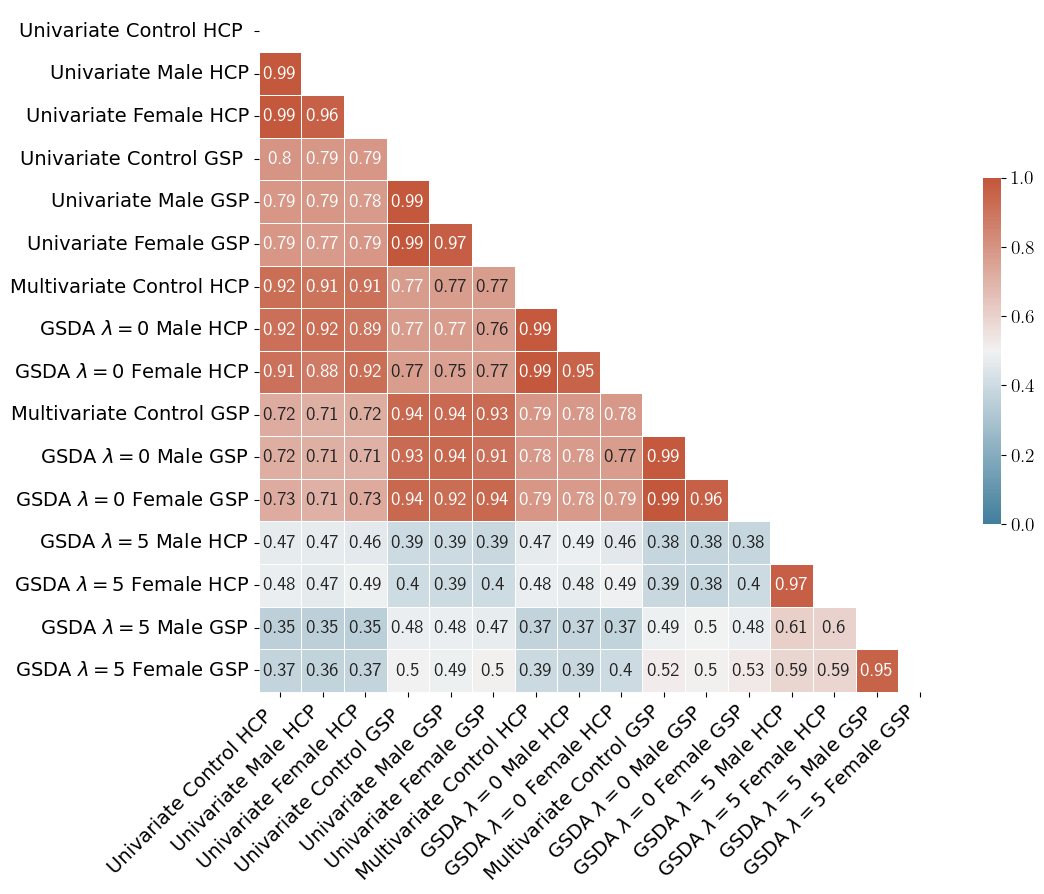

In [ ]:
fontsize = 14
corr = weight_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.rcParams.update({'font.size': fontsize})
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.rcParams['text.usetex'] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0.5, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
            # cbar_kws={"shrink": .5, "use_gridspec": False, "location": "top"})  #, annot_kws={"rotation": 45})
plt.rcParams['text.usetex'] = False
# plt.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(list(weight_df.columns.values), rotation = 45, ha="right")
plt.savefig('figures/corr_annot.svg', format='svg', bbox_inches='tight')
# plt.savefig('figures/corr_annot.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('figures/corr_annot.png', format='png', bbox_inches='tight')
plt.show()

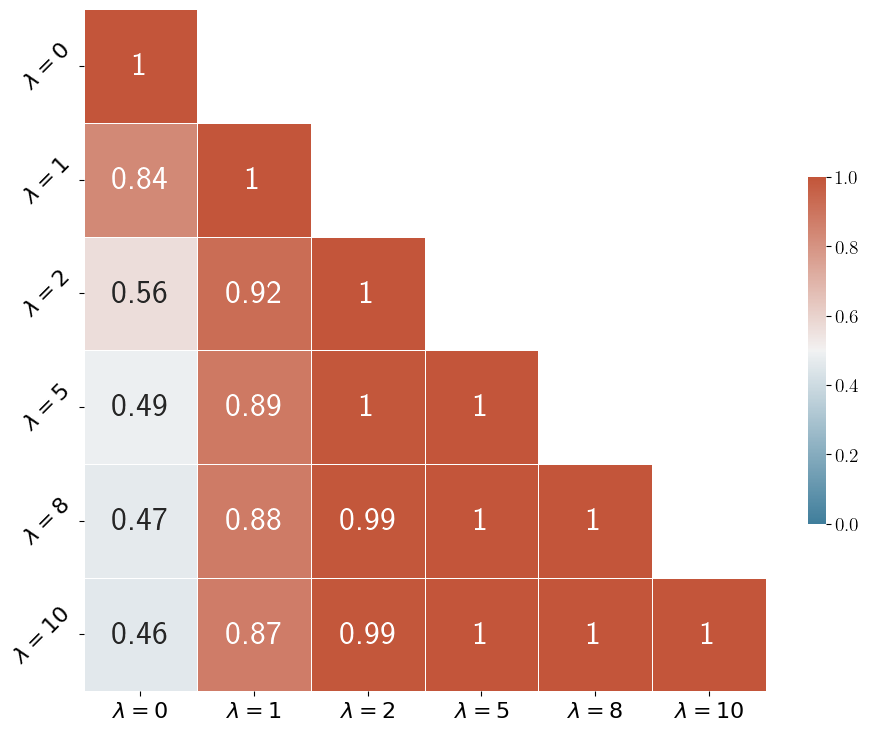

In [ ]:
plot.load_coef_plot_corr("HCP", 0)

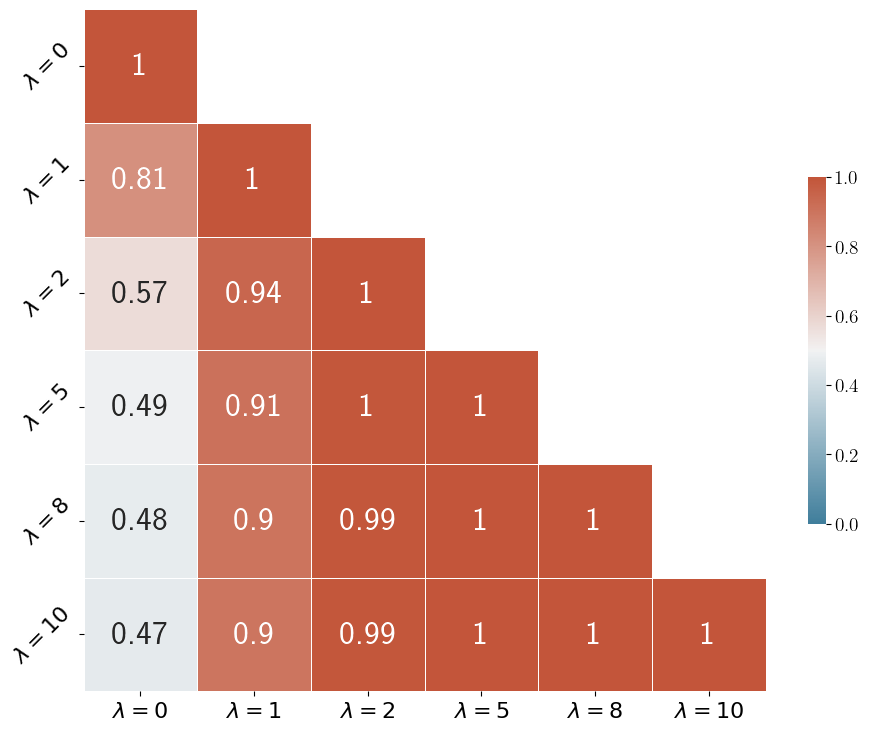

In [ ]:
plot.load_coef_plot_corr("HCP", 1)

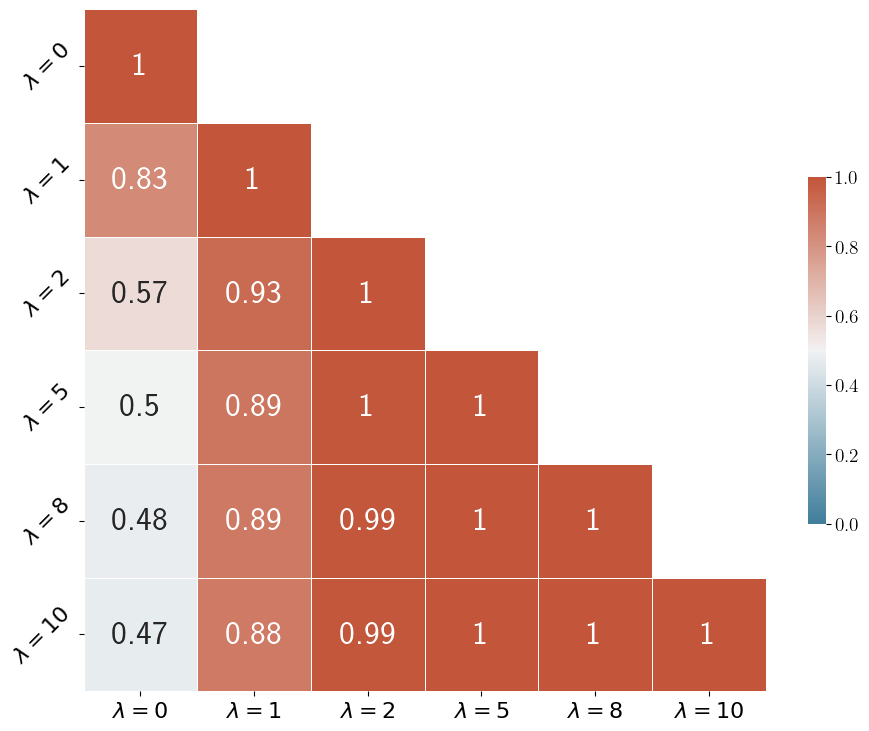

In [ ]:
plot.load_coef_plot_corr("GSP", 0)

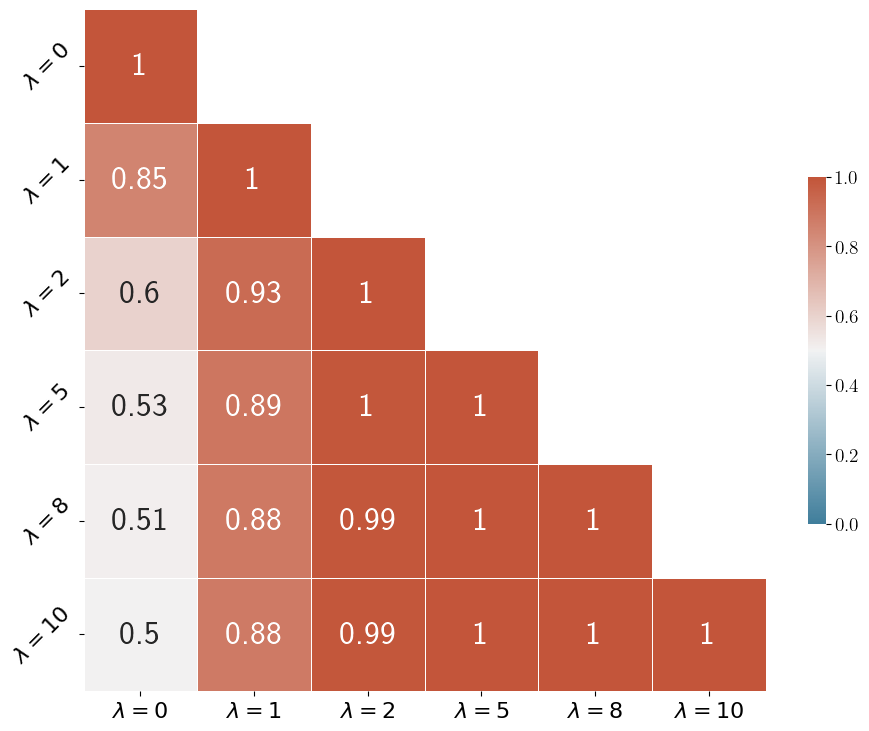

In [ ]:
plot.load_coef_plot_corr("GSP", 1)